In [1]:
# Question 3 - Are there significant differences when comparing IMDB Score and Title Type? 

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a file path
filepath = "Netflix TV Shows and Movies.csv"

# Read in the data. 
df = pd.read_csv(filepath)

df.head(30)

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
5,5,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,tt0066999,7.7,153463.0
6,6,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,tt0058385,7.8,94121.0
7,7,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,tt0080453,5.8,69053.0
8,8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,tt0061418,7.7,111189.0
9,9,tm67378,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,tt0060862,7.3,16168.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [5]:
# Replacing NaN with unknown to clean df
df['age_certification'].fillna('unknown', inplace=True)

C:\Users\ssarkis\AppData\Local\Temp\ipykernel_17516\3621362582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_certification'].fillna('unknown', inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  5283 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [7]:
# Dropping nulls with no imbd votes
filtered_df = df.dropna()

In [8]:
selected_col = ["index", "title", "type", "description", "release_year", "age_certification", "imdb_score", "imdb_votes"]
clean_df = filtered_df[selected_col].copy()

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5263 entries, 0 to 5282
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5263 non-null   int64  
 1   title              5263 non-null   object 
 2   type               5263 non-null   object 
 3   description        5263 non-null   object 
 4   release_year       5263 non-null   int64  
 5   age_certification  5263 non-null   object 
 6   imdb_score         5263 non-null   float64
 7   imdb_votes         5263 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 370.1+ KB


In [10]:
df = clean_df.set_index("type")
df.head()

,index,title,description,release_year,age_certification,imdb_score,imdb_votes
type,,,,,,,
MOVIE,0,Taxi Driver,A mentally unstable Vietnam War veteran works ...,1976,R,8.3,795222.0
MOVIE,1,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",1975,PG,8.2,530877.0
MOVIE,2,Life of Brian,"Brian Cohen is an average young Jewish man, bu...",1979,R,8.0,392419.0
MOVIE,3,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,1973,R,8.1,391942.0
SHOW,4,Monty Python's Flying Circus,A British sketch comedy series with the shows ...,1969,TV-14,8.8,72895.0


In [11]:
df.sort_values("release_year", ascending=False)

,index,title,description,release_year,age_certification,imdb_score,imdb_votes
type,,,,,,,
MOVIE,5052,11M,"Survivors and insiders recount March 11, 2004'...",2022,unknown,7.0,796.0
MOVIE,4575,Taylor Tomlinson: Look at You,Breakups. Therapy. Bangs. Taylor's gone throug...,2022,unknown,7.3,1707.0
MOVIE,4895,Looop Lapeta,"When her boyfriend loses a mobster's cash, Sav...",2022,unknown,5.1,4170.0
MOVIE,4757,My Father's Violin,Through their shared grief and connection to m...,2022,unknown,6.4,3049.0
MOVIE,4562,Yaksha: Ruthless Operations,"Nicknamed after a human-devouring spirit, the ...",2022,unknown,6.2,2486.0
...,...,...,...,...,...,...,...
MOVIE,15,Cairo Station,"Qinawi, a physically challenged peddler who ma...",1958,unknown,7.5,4385.0
MOVIE,21,Dark Waters,"Ragab, a poor sailor, returns home to Alexandr...",1956,unknown,6.7,590.0
MOVIE,27,The Blazing Sun,A rich landlord floods and destroys a village ...,1954,unknown,7.4,1219.0


In [12]:
df.sort_values("release_year", ascending=True)

,index,title,description,release_year,age_certification,imdb_score,imdb_votes
type,,,,,,,
MOVIE,23,Raya and Sakina,Dramatic rendition of a real life crime wave t...,1953,unknown,6.8,231.0
MOVIE,27,The Blazing Sun,A rich landlord floods and destroys a village ...,1954,unknown,7.4,1219.0
MOVIE,14,White Christmas,Two talented song-and-dance men team up after ...,1954,unknown,7.5,42373.0
MOVIE,21,Dark Waters,"Ragab, a poor sailor, returns home to Alexandr...",1956,unknown,6.7,590.0
MOVIE,15,Cairo Station,"Qinawi, a physically challenged peddler who ma...",1958,unknown,7.5,4385.0
...,...,...,...,...,...,...,...
MOVIE,4755,The Privilege,A wealthy teen and his friends attending an el...,2022,unknown,4.6,3900.0
MOVIE,4895,Looop Lapeta,"When her boyfriend loses a mobster's cash, Sav...",2022,unknown,5.1,4170.0
MOVIE,4757,My Father's Violin,Through their shared grief and connection to m...,2022,unknown,6.4,3049.0


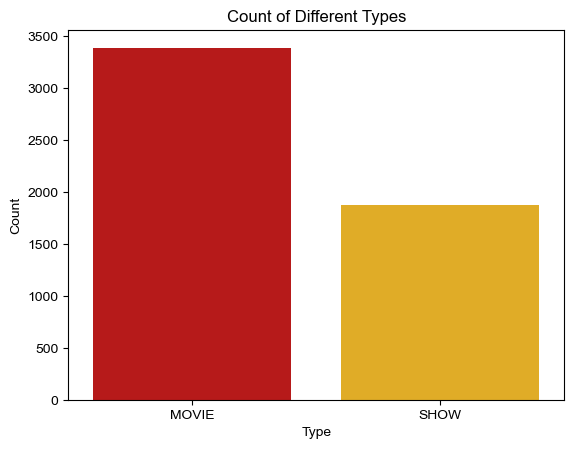

In [13]:
sns.countplot(x='type', data=clean_df, palette={"MOVIE": "#D00000", "SHOW": "#FFBA08"})
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Different Types')
plt.show()

In [14]:
cols_agg = {
    "imdb_score": ["mean", "median", "var", "std", "sem"]
}

leaderboard = clean_df.groupby(["type"]).agg(cols_agg).reset_index()
leaderboard

type imdb_score                                     
               mean median       var       std       sem
0  MOVIE   6.266322    6.4  1.246592  1.116509  0.019182
1   SHOW   7.017813    7.2  1.166054  1.079840  0.024938

In [15]:
type_mean = df.groupby(["type"])["imdb_score"].mean()
type_median = df.groupby(["type"])["imdb_score"].median()
type_variance = df.groupby(["type"])["imdb_score"].var()
type_std = df.groupby(["type"])["imdb_score"].std()
type_sem = df.groupby(["type"])["imdb_score"].sem()

type_data2 = {
    "Average Score by Type": type_mean,
    "Type Median Score": type_median,
    "Type Variance": type_variance,
    "Type Standard Deviation": type_std,
    "Type SEM": type_sem
}

leaderboard = pd.DataFrame(type_data2).reset_index()
leaderboard

,type,Average Score by Type,Type Median Score,Type Variance,Type Standard Deviation,Type SEM
0,MOVIE,6.266322,6.4,1.246592,1.116509,0.019182
1,SHOW,7.017813,7.2,1.166054,1.079840,0.024938


In [19]:
from scipy.stats import ttest_ind

MOVIE = clean_df[clean_df['type'] == 'MOVIE']
SHOW = clean_df[clean_df['type'] == 'SHOW']

ttest_ind(MOVIE['imdb_score'], SHOW['imdb_score'])

TtestResult(statistic=-23.657722669112015, pvalue=1.1333787241273119e-117, df=5261.0)

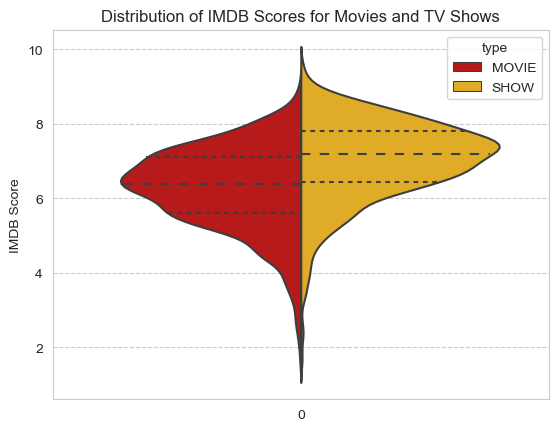

In [16]:
clean_df["dummy"]=0
sns.violinplot(data=clean_df, x='dummy', y='imdb_score', inner="quart", split=True, hue="type", palette={"MOVIE": "#D00000", "SHOW": "#FFBA08"})
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.title('Distribution of IMDB Scores for Movies and TV Shows')
plt.ylabel('IMDB Score')
plt.xlabel('')


plt.show()

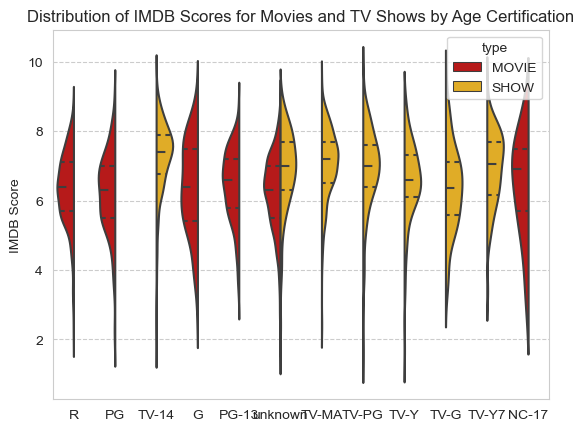

In [17]:
sns.violinplot(data=clean_df, x='age_certification', y='imdb_score', inner="quart", split=True, hue="type", gap=0, palette={"MOVIE": "#D00000", "SHOW": "#FFBA08"})
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.title('Distribution of IMDB Scores for Movies and TV Shows by Age Certification')
plt.xlabel('')
plt.ylabel('IMDB Score')


plt.show()